# Implementing the simple model

In [1]:
#Import the relevant modules
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

import OpinionGraph
import OpinionAlgorithm

## Create random graph
This is implemented as a `MultiGraph` from `Networkx` which can have self-loops and multi-edges. The function that creates the random graph, `OpinionGraph.CreateRandom` creates a graph with NO self-loops and NO multi-edges.

In [2]:
n = 30 # number of nodes
m = 120 #number of edges
gamma = 10 #ratio #nodes/#opinions
n_opinion = int(n/gamma) #number of opinions

#Generate random graph
G1 = OpinionGraph.CreateRandom(n, m, n_opinion)

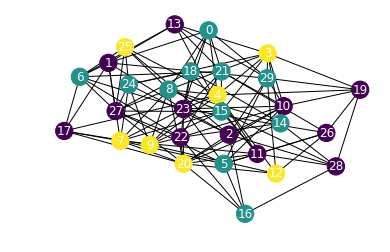

In [3]:
#plot the opinion graph
G1.plot()

In [4]:
G1.summary()

Total number of components: 1
Components size: Counter({30: 1})
All components in consensus: False
Percentage of nodes in components in consensus state: 0.0


## Tests of the algorithm
### A) With $\phi=1$, i.e. only step 1

------------- Initial graph ------------


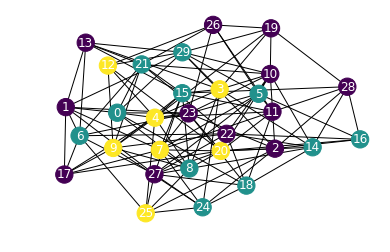

------------- Step 0 ------------
Selected node_i : 16
DOING STEP 1
Neighbors of node_i : [2, 5, 22, 28, 20]
Selected node_j : 5
Nodes with opinion g_i : [0, 5, 6, 8, 14, 15, 18, 21, 24, 29]
Selected node_j_prime : 0
Edge moved from (16,5) to (16,0)


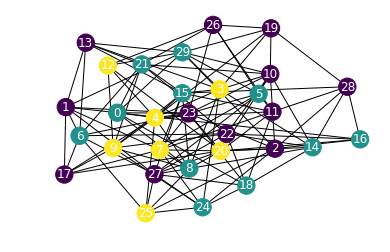

------------- Step 1 ------------
Selected node_i : 28
DOING STEP 1
Neighbors of node_i : [2, 11, 14, 15, 16, 19]
Selected node_j : 14
Nodes with opinion g_i : [1, 2, 10, 11, 13, 17, 19, 22, 23, 26, 27]
Selected node_j_prime : 11
Edge moved from (28,14) to (28,11)


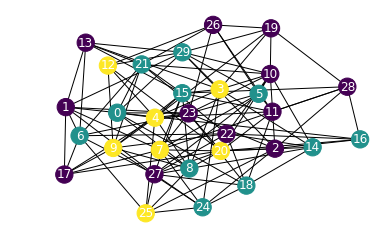

------------- Step 2 ------------
Selected node_i : 25
DOING STEP 1
Neighbors of node_i : [2, 4, 6, 8, 24, 27]
Selected node_j : 4
Nodes with opinion g_i : [3, 4, 7, 9, 12, 20]
Selected node_j_prime : 4
Edge moved from (25,4) to (25,4)


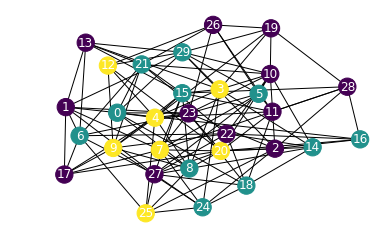

------------- Step 3 ------------
Selected node_i : 16
DOING STEP 1
Neighbors of node_i : [2, 22, 28, 20, 0]
Selected node_j : 28
Nodes with opinion g_i : [0, 5, 6, 8, 14, 15, 18, 21, 24, 29]
Selected node_j_prime : 24
Edge moved from (16,28) to (16,24)


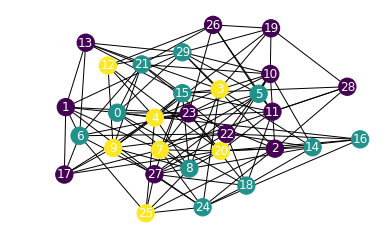

------------- Step 4 ------------
Selected node_i : 4
DOING STEP 1
Neighbors of node_i : [0, 3, 17, 9, 8, 11, 23, 12, 19, 15, 25]
Selected node_j : 9
Nodes with opinion g_i : [3, 7, 9, 12, 20, 25]
Selected node_j_prime : 7
Edge moved from (4,9) to (4,7)


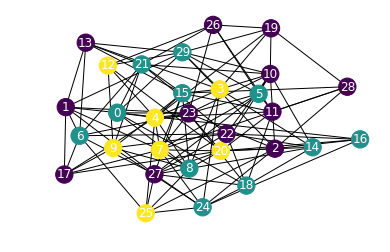

------------- Step 5 ------------
Selected node_i : 1
DOING STEP 1
Neighbors of node_i : [0, 27, 6, 13, 7, 29, 23, 17]
Selected node_j : 27
Nodes with opinion g_i : [2, 10, 11, 13, 17, 19, 22, 23, 26, 27, 28]
Selected node_j_prime : 23
Edge moved from (1,27) to (1,23)


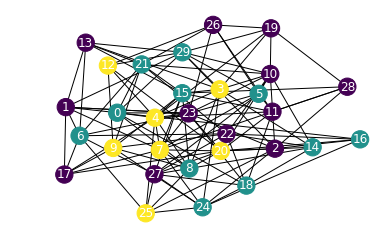

------------- Step 6 ------------
Selected node_i : 15
DOING STEP 1
Neighbors of node_i : [3, 4, 7, 8, 9, 11, 13, 28, 27, 21]
Selected node_j : 27
Nodes with opinion g_i : [0, 5, 6, 8, 14, 16, 18, 21, 24, 29]
Selected node_j_prime : 0
Edge moved from (15,27) to (15,0)


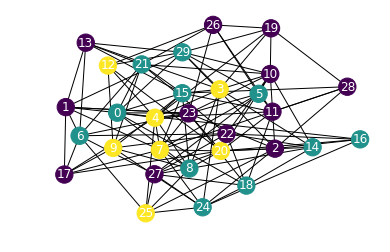

------------- Step 7 ------------
Selected node_i : 5
DOING STEP 1
Neighbors of node_i : [26, 7, 23, 27, 29, 11, 10]
Selected node_j : 7
Nodes with opinion g_i : [0, 6, 8, 14, 15, 16, 18, 21, 24, 29]
Selected node_j_prime : 24
Edge moved from (5,7) to (5,24)


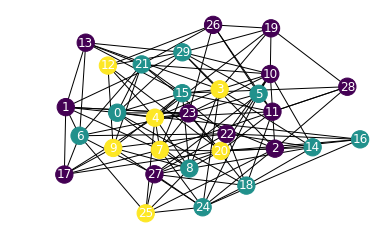

------------- Step 8 ------------
Selected node_i : 25
DOING STEP 1
Neighbors of node_i : [2, 6, 8, 24, 27, 4]
Selected node_j : 24
Nodes with opinion g_i : [3, 4, 7, 9, 12, 20]
Selected node_j_prime : 12
Edge moved from (25,24) to (25,12)


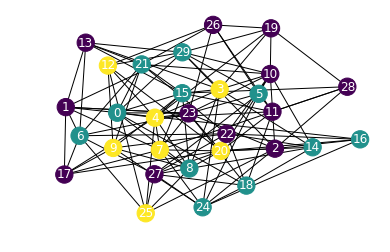

------------- Step 9 ------------
Selected node_i : 26
DOING STEP 1
Neighbors of node_i : [5, 11, 12, 19, 21, 23]
Selected node_j : 23
Nodes with opinion g_i : [1, 2, 10, 11, 13, 17, 19, 22, 23, 27, 28]
Selected node_j_prime : 17
Edge moved from (26,23) to (26,17)


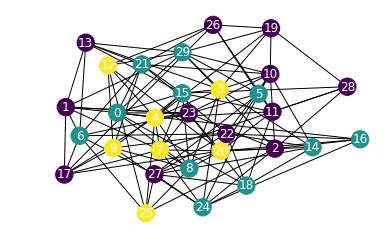

In [5]:
phi = 1
n_step = 10
OpinionAlgorithm.Simulation(G1, phi, n_step, verbose=True)

------------- Initial graph ------------


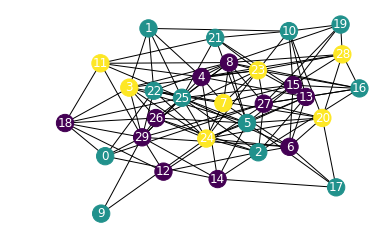

------------- Final graph -------------
**** Same layout **** 


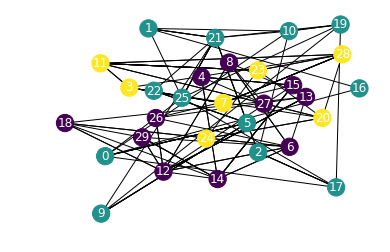

**** New layout **** 


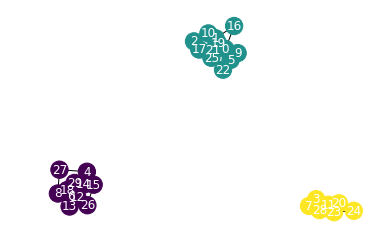

In [6]:
n_step = 1000
G2 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.Simulation(G2, phi, n_step, verboseBeginEnd=True)

In [7]:
G2.summary()

Total number of components: 3
Components size: Counter({12: 1, 7: 1, 11: 1})
All components in consensus: True
Percentage of nodes in components in consensus state: 1.0


In [8]:
G3 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.SimulationEndConsensus(G3, phi, verbose=False)

467

In [9]:
G3.summary()

Total number of components: 3
Components size: Counter({9: 1, 8: 1, 13: 1})
All components in consensus: True
Percentage of nodes in components in consensus state: 1.0


### B) With $\phi=0$, i.e. only step 2

------------- Initial graph ------------


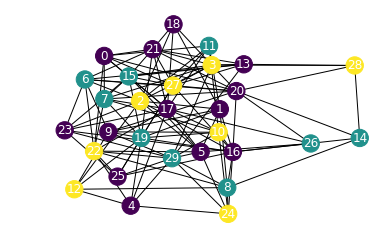

------------- Step 0 ------------
Selected node_i : 28
DOING STEP 2
Neighbors of node_i : [3, 13, 14, 20]
Selected node_j : 14
Opinion of node 28 changed from 2 to 1


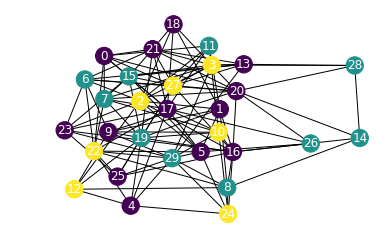

------------- Step 1 ------------
Selected node_i : 0
DOING STEP 2
Neighbors of node_i : [17, 27, 20, 22, 15, 21, 11, 7]
Selected node_j : 21


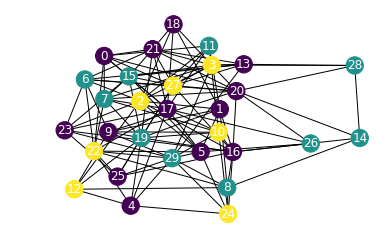

------------- Step 2 ------------
Selected node_i : 10
DOING STEP 2
Neighbors of node_i : [7, 9, 19, 16, 17, 29, 24, 11]
Selected node_j : 24


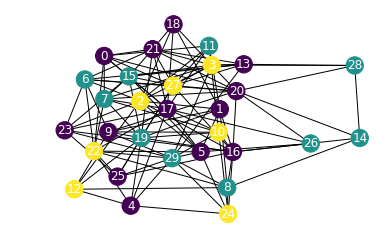

------------- Step 3 ------------
Selected node_i : 29
DOING STEP 2
Neighbors of node_i : [3, 4, 5, 8, 9, 10, 13, 22, 23, 24, 25]
Selected node_j : 22
Opinion of node 29 changed from 1 to 2


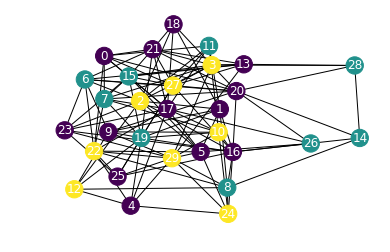

------------- Step 4 ------------
Selected node_i : 22
DOING STEP 2
Neighbors of node_i : [0, 4, 5, 6, 7, 8, 17, 29, 25]
Selected node_j : 4
Opinion of node 22 changed from 2 to 0


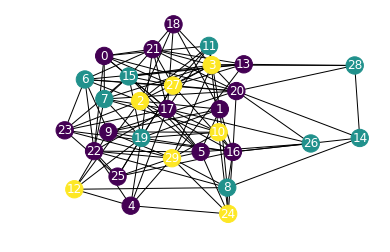

------------- Step 5 ------------
Selected node_i : 24
DOING STEP 2
Neighbors of node_i : [4, 5, 8, 10, 16, 29]
Selected node_j : 4
Opinion of node 24 changed from 2 to 0


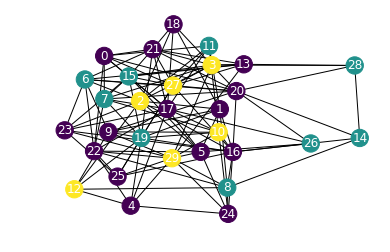

------------- Step 6 ------------
Selected node_i : 1
DOING STEP 2
Neighbors of node_i : [19, 11, 9, 5, 18, 16, 8, 2]
Selected node_j : 9


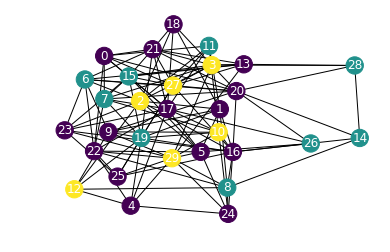

------------- Step 7 ------------
Selected node_i : 6
DOING STEP 2
Neighbors of node_i : [2, 22, 21, 23, 9, 27, 20, 13]
Selected node_j : 21
Opinion of node 6 changed from 1 to 0


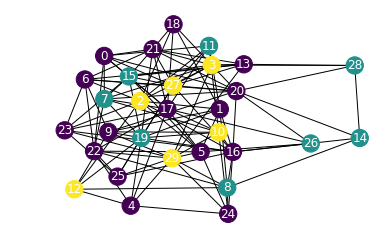

------------- Step 8 ------------
Selected node_i : 24
DOING STEP 2
Neighbors of node_i : [4, 5, 8, 10, 16, 29]
Selected node_j : 8
Opinion of node 24 changed from 0 to 1


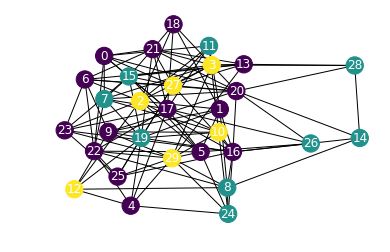

------------- Step 9 ------------
Selected node_i : 21
DOING STEP 2
Neighbors of node_i : [0, 3, 6, 13, 15, 17, 18, 19, 20, 27]
Selected node_j : 3
Opinion of node 21 changed from 0 to 2


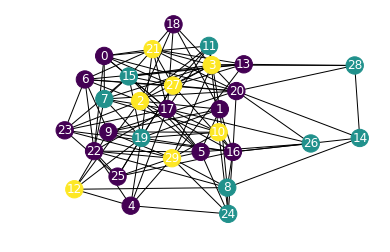

------------- Step 10 ------------
Selected node_i : 4
DOING STEP 2
Neighbors of node_i : [12, 17, 22, 29, 19, 24]
Selected node_j : 19
Opinion of node 4 changed from 0 to 1


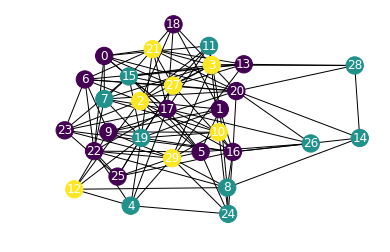

------------- Step 11 ------------
Selected node_i : 21
DOING STEP 2
Neighbors of node_i : [0, 3, 6, 13, 15, 17, 18, 19, 20, 27]
Selected node_j : 20
Opinion of node 21 changed from 2 to 0


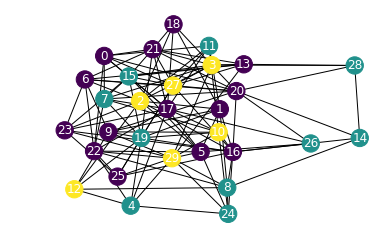

------------- Step 12 ------------
Selected node_i : 13
DOING STEP 2
Neighbors of node_i : [3, 6, 27, 15, 28, 21, 29]
Selected node_j : 3
Opinion of node 13 changed from 0 to 2


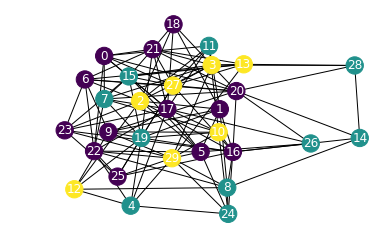

------------- Step 13 ------------
Selected node_i : 29
DOING STEP 2
Neighbors of node_i : [3, 4, 5, 8, 9, 10, 13, 22, 23, 24, 25]
Selected node_j : 5
Opinion of node 29 changed from 2 to 0


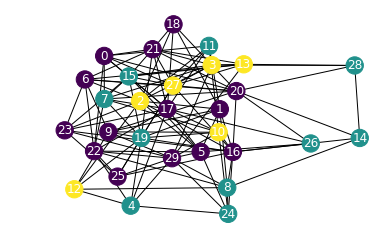

------------- Step 14 ------------
Selected node_i : 10
DOING STEP 2
Neighbors of node_i : [7, 9, 19, 16, 17, 29, 24, 11]
Selected node_j : 17
Opinion of node 10 changed from 2 to 0


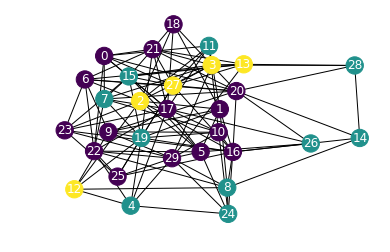

------------- Step 15 ------------
Selected node_i : 0
DOING STEP 2
Neighbors of node_i : [17, 27, 20, 22, 15, 21, 11, 7]
Selected node_j : 17


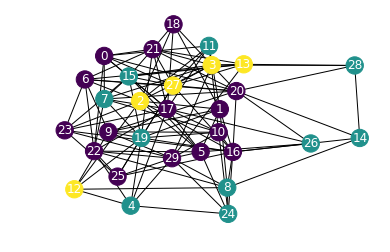

------------- Step 16 ------------
Selected node_i : 25
DOING STEP 2
Neighbors of node_i : [16, 19, 22, 23, 27, 29]
Selected node_j : 19
Opinion of node 25 changed from 0 to 1


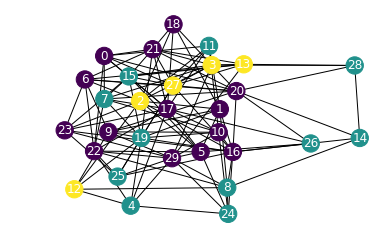

------------- Step 17 ------------
Selected node_i : 22
DOING STEP 2
Neighbors of node_i : [0, 4, 5, 6, 7, 8, 17, 29, 25]
Selected node_j : 6


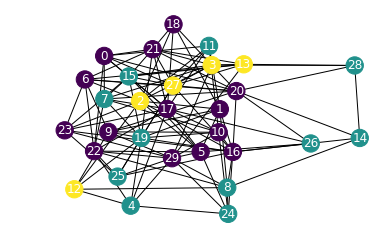

------------- Step 18 ------------
Selected node_i : 16
DOING STEP 2
Neighbors of node_i : [1, 2, 8, 10, 14, 20, 27, 24, 19, 25, 23, 26]
Selected node_j : 26
Opinion of node 16 changed from 0 to 1


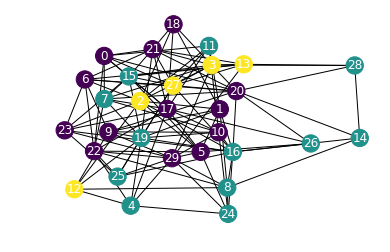

------------- Step 19 ------------
Selected node_i : 28
DOING STEP 2
Neighbors of node_i : [3, 13, 14, 20]
Selected node_j : 3
Opinion of node 28 changed from 1 to 2


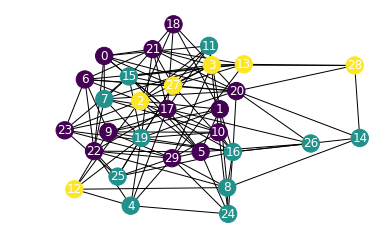

------------- Step 20 ------------
Selected node_i : 16
DOING STEP 2
Neighbors of node_i : [1, 2, 8, 10, 14, 20, 27, 24, 19, 25, 23, 26]
Selected node_j : 2
Opinion of node 16 changed from 1 to 2


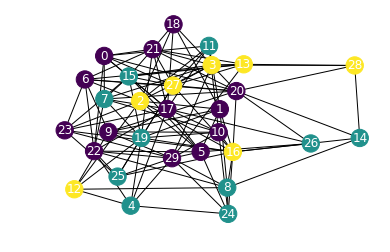

------------- Step 21 ------------
Selected node_i : 24
DOING STEP 2
Neighbors of node_i : [4, 5, 8, 10, 16, 29]
Selected node_j : 29
Opinion of node 24 changed from 1 to 0


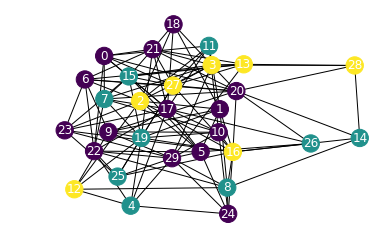

------------- Step 22 ------------
Selected node_i : 19
DOING STEP 2
Neighbors of node_i : [1, 4, 7, 9, 10, 12, 15, 16, 25, 27, 21]
Selected node_j : 27
Opinion of node 19 changed from 1 to 2


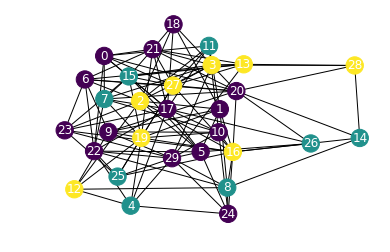

------------- Step 23 ------------
Selected node_i : 26
DOING STEP 2
Neighbors of node_i : [5, 16, 17, 20]
Selected node_j : 16
Opinion of node 26 changed from 1 to 2


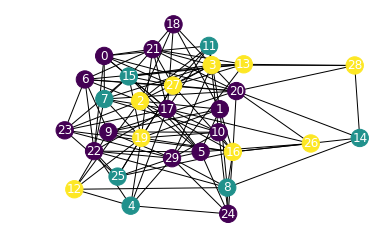

------------- Step 24 ------------
Selected node_i : 1
DOING STEP 2
Neighbors of node_i : [19, 11, 9, 5, 18, 16, 8, 2]
Selected node_j : 19
Opinion of node 1 changed from 0 to 2


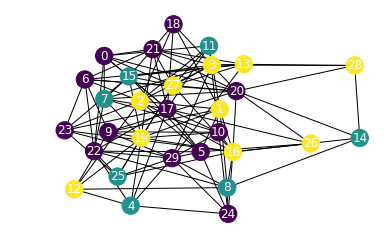

------------- Step 25 ------------
Selected node_i : 10
DOING STEP 2
Neighbors of node_i : [7, 9, 19, 16, 17, 29, 24, 11]
Selected node_j : 29


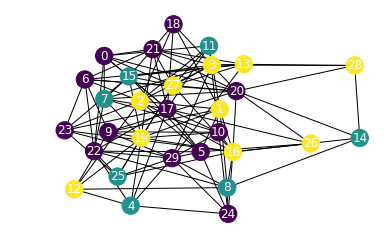

------------- Step 26 ------------
Selected node_i : 7
DOING STEP 2
Neighbors of node_i : [0, 3, 15, 19, 20, 22, 17, 10]
Selected node_j : 19
Opinion of node 7 changed from 1 to 2


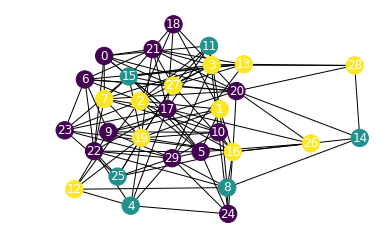

------------- Step 27 ------------
Selected node_i : 28
DOING STEP 2
Neighbors of node_i : [3, 13, 14, 20]
Selected node_j : 20
Opinion of node 28 changed from 2 to 0


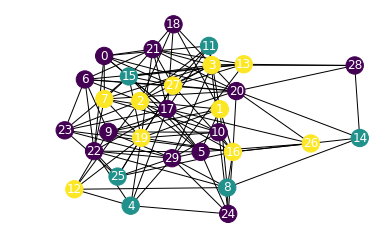

------------- Step 28 ------------
Selected node_i : 19
DOING STEP 2
Neighbors of node_i : [1, 4, 7, 9, 10, 12, 15, 16, 25, 27, 21]
Selected node_j : 16


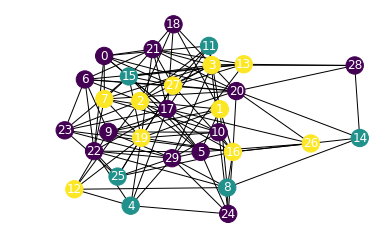

------------- Step 29 ------------
Selected node_i : 23
DOING STEP 2
Neighbors of node_i : [2, 6, 15, 16, 17, 25, 29]
Selected node_j : 16
Opinion of node 23 changed from 0 to 2


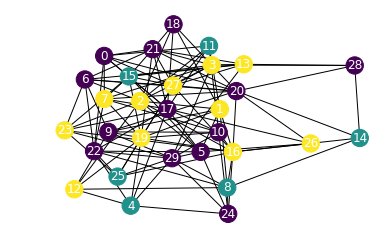

In [12]:
phi = 0
n_step = 30
G4 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.Simulation(G4, phi, n_step, verbose=True)

------------- Initial graph ------------


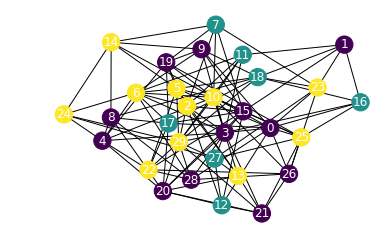

------------- Final graph -------------
**** Same layout **** 


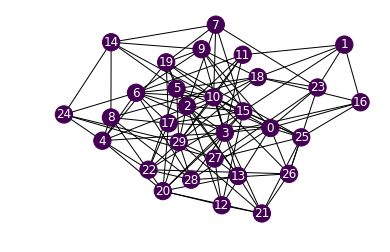

**** New layout **** 


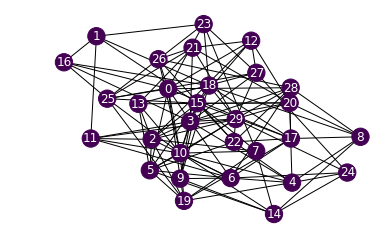

In [13]:
n_step = 1000
G5 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.Simulation(G5, phi, n_step, verboseBeginEnd=True)

In [14]:
G5.summary()

Total number of components: 1
Components size: Counter({30: 1})
All components in consensus: True
Percentage of nodes in components in consensus state: 1.0


In [15]:
G6 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.SimulationEndConsensus(G6, phi, verbose=False)

863

In [16]:
G6.summary()

Total number of components: 1
Components size: Counter({30: 1})
All components in consensus: True
Percentage of nodes in components in consensus state: 1.0


### C) With $0<\phi<1$ , i.e. mix of steps

------------- Initial graph ------------


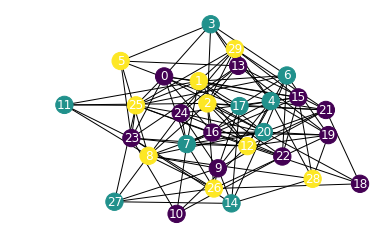

------------- Final graph -------------
**** Same layout **** 


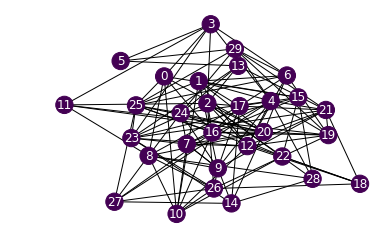

**** New layout **** 


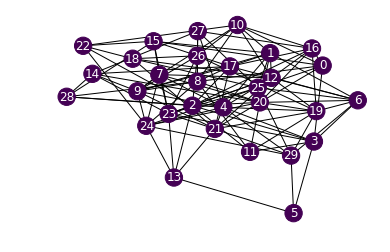

In [17]:
phi = 0.04
n_step = 1000
G7 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.Simulation(G7, phi, n_step, verboseBeginEnd=True)

In [18]:
G8 = OpinionGraph.CreateRandom(n, m, n_opinion)
OpinionAlgorithm.SimulationEndConsensus(G8, phi, verbose=False)

704

In [19]:
G8.summary()

Total number of components: 1
Components size: Counter({30: 1})
All components in consensus: True
Percentage of nodes in components in consensus state: 1.0
